<a href="https://colab.research.google.com/github/DacioSB/DataScience/blob/master/pandaspt2/PandasPt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados

In [0]:
import pandas as pd

In [0]:
dados_aluguel = pd.read_csv("aluguel.csv", sep = ";")
dados_aluguel.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [0]:
#infos gerais do DF
dados_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [0]:
#Tipos
dados_aluguel.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [0]:
dados_aluguel.Valor.describe()

count    3.294300e+04
mean     1.295266e+04
std      6.675220e+05
min      7.500000e+01
25%      1.500000e+03
50%      2.800000e+03
75%      6.500000e+03
max      1.200000e+08
Name: Valor, dtype: float64

In [0]:
#infos mas como um dataframe
tipos_dados = pd.DataFrame(dados_aluguel.dtypes, columns = ['tipos de dados'])
tipos_dados.columns.name = "Variavel"
tipos_dados

Variavel,tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [0]:
print("A base de dados apresenta {} linhas (valores) para {} colunas (variaveis)".format(dados_aluguel.shape[0], dados_aluguel.shape[1]))

A base de dados apresenta 32960 linhas (valores) para 9 colunas (variaveis)


# Relatorio de Analise II


Tipos de imoveis

In [0]:
dados_aluguel.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [0]:
dados_aluguel['Tipo'].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

In [0]:
#Pega o primeiro e elimina os restantes
#Tambem tem o parametro inplace que muda direto no meu dataset
dados_aluguel['Tipo'].drop_duplicates(keep = 'first')

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

### Organizando visualizacao

In [0]:
tipo_imovel = pd.DataFrame(dados_aluguel['Tipo'].drop_duplicates(keep = 'first'))

In [0]:
tipo_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [0]:
#Modificar os index
tipo_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [0]:
#Transformando os indices loucos em indices legais de se ver por meio do range
tipo_imovel.index = range(tipo_imovel.shape[0])

In [0]:
#Renomeando coluna dos indexes
tipo_imovel.columns.name = "ID"
tipo_imovel


ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [0]:
#Fazendo a mesma coisa so que com unique
my_unique = pd.DataFrame(dados_aluguel['Tipo'].unique(), columns = ['Tipo'])
my_unique.columns.name = "ID"

In [0]:
my_unique

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Relatorio de Analise III

### Imoveis Residenciais

In [0]:
dados_aluguel.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [0]:
#O chefe agora so quer construcoes do tipo residencial
list(dados_aluguel['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [0]:
residenciais = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila'
 ]
residenciais

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [0]:
#So vai ser true se tiver dentro dos residencias (eu meio que criei um tipo)
selecao = dados_aluguel['Tipo'].isin(residenciais)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [0]:
#Com isso a gente cria um novo DF so com os residenciais
dados_residencial = dados_aluguel[selecao]
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [0]:
#Depois de excluir os tipos nao residenciais, os indices ficaram bagunçados
dados_residencial.index= range(dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### Exportando essa tabela acima para um csv

In [0]:
dados_residencial.to_csv("residencial.csv", index = False)

In [0]:
#Quando eu importar, ele vai entregar outra coluna de indices, nao quero isso... Como consertar?
#Disso -> dados_residencial.to_csv("residencial.csv") PARA Isso -> dados_residencial.to_csv("residencial.csv", index = False)
residencial = pd.read_csv("residencial.csv")
residencial


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


#Selecoes no SubDF 'Residencial'

In [0]:
#Selecione somente os imoveis com tipo "Apartamento"

selecao = residencial["Tipo"] == "Apartamento"
selecao

0        False
1        False
2         True
3         True
4         True
         ...  
22575     True
22576    False
22577     True
22578     True
22579     True
Name: Tipo, Length: 22580, dtype: bool

In [0]:
selecao = residencial[selecao]
selecao.index = range(selecao.shape[0])
selecao.shape[0]

19532

In [0]:
#Somente imoveis casa de condominio ou casa ou casa de vila
selecao2 = (residencial["Tipo"] == "Casa de Condomínio") | (residencial["Tipo"] == "Casa") | (residencial["Tipo"] == "Casa de Vila")
selecao2 = residencial[selecao2]
selecao2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
18,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
...,...,...,...,...,...,...,...,...,...
22545,Casa de Condomínio,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
22547,Casa,Bento Ribeiro,2,1,0,60,1400.0,NaN,NaN
22555,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,NaN
22558,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


In [0]:
#Selecione areas maiores ou iguais a 60 e menores ou iguais a 100
selecao3 = (residencial['Area'] >= 60) & (residencial['Area'] <= 100)
selecao3 = residencial[selecao3]
selecao3

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
22568,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [0]:
#Consigo o mesmo resultado com querys
residencial.query("Area >=60 and Area <= 100")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
22568,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [0]:
#Selecione apenas as residencias com 4 quartos pra cima e valor menor que 2000
selecao4 = (residencial["Quartos"] >= 4) & (residencial["Valor"] < 2000)
selecao4 = residencial[selecao4]
selecao4.index = range(selecao4.shape[0])
selecao4 

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
4,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0
5,Casa de Vila,Méier,4,0,1,85,1600.0,NaN,NaN
6,Casa,Campo Grande,4,1,0,140,1700.0,NaN,NaN
7,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,NaN
8,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0
9,Apartamento,Cidade Nova,4,0,0,110,1300.0,NaN,NaN


In [0]:
#Mesmo resultado com query
selecao4 = residencial.query("Quartos >= 4 and Valor < 2000")
selecao4.index = range(selecao4.shape[0])
selecao4

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
4,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0
5,Casa de Vila,Méier,4,0,1,85,1600.0,NaN,NaN
6,Casa,Campo Grande,4,1,0,140,1700.0,NaN,NaN
7,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,NaN
8,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0
9,Apartamento,Cidade Nova,4,0,0,110,1300.0,NaN,NaN


# Tratamento de dados faltantes

In [0]:
residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [0]:
#Se a informação é nan (not a number) entao ele marca como false
residencial.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [0]:
#Ajuda a ver que valor e condominio e iput possuem valores nulos
residencial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [0]:
#Ta ai os 9 valores null isso aqui equivale a isso aqui
#myRes = residencial['Valor'].isnull()
#myRes = residencial[myRes]
#myRes
residencial[residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [0]:
#Excluindo as linhas com valores nulos no subset 'Valor'
residencial.dropna(subset = ['Valor'], inplace = True)
#Comprovando que realmente nao existe mais no nosso df valores nan na coluna 'Valor'
residencial[residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [0]:
#Agora temos os condominios nulos
#A gente so quer excluir do nosso df os que nao forem apartamento e tiverem o condominio (porque nao faz sentido)
#Pra isso nega a minha selecao com o simbolo ~
residencial[residencial['Condominio'].isnull()].shape[0]

1813

In [0]:
selecao = (residencial['Tipo'] == "Apartamento") & (residencial["Condominio"].isnull())
type(selecao)

pandas.core.series.Series

In [0]:
residencial = residencial[~selecao]
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [0]:
#Preencher os nan com 0
residencial.fillna({"Condominio": 0, "IPTU": 0}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
residencial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [0]:
residencial.to_csv("residencial.csv", index = False)

In [0]:
residencial = pd.read_csv("residencial.csv")

In [0]:
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Novas Variaveis

In [0]:
#Valor bruto
#Valor por metro quadrado
#Novo tipo (agregando casa + apartamento)

In [0]:
residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [0]:
residencial['Valor Bruto'] = residencial['Valor'] + residencial['Condominio'] + residencial['IPTU']
residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [0]:
residencial['M2'] = residencial["Valor"] / residencial['Area']
residencial['M2'] = residencial['M2'].round(1)
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,M2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.3
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.7
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.9
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.6
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.1
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.2


In [0]:
residencial["Bruto M2"] = (residencial["Valor Bruto"] / residencial["Area"]).round(1)
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,M2,Bruto M2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5,56.5
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.0,70.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.3,80.7
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.7,21.5
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.0,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.9,20.5
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.6,43.5
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.1,33.8
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.2,40.5


In [0]:
#Interessante... Função apply com lambda
#Faz uma funcao que escreve 'Casa' toda vez que x estiver no array casa, se nao, eu preencho com apartamento
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
residencial["Agregado"] = residencial['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,M2,Bruto M2,Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5,56.5,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.0,70.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.3,80.7,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.7,21.5,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.0,32.4,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.9,20.5,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.6,43.5,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.1,33.8,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.2,40.5,Apartamento


# Excluir variaveis

In [0]:
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,M2,Bruto M2,Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5,56.5,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.0,70.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.3,80.7,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.7,21.5,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.0,32.4,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.9,20.5,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.6,43.5,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.1,33.8,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.2,40.5,Apartamento


In [0]:
residencial.drop(['Valor Bruto', 'Bruto M2'], axis = 1, inplace = True)
residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,M2,Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.5,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.3,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.7,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.9,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.6,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.1,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.2,Apartamento


In [0]:
residencial.to_csv("residencial.csv", index = False)

# Criando agrupamentos

In [0]:
residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,M2,Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.5,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.3,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.7,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.3,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.4,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.4,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.7,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.0,Apartamento


In [0]:
bairros = residencial['Bairro'].unique()
bairros

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

In [0]:
selecao = residencial['Bairro'].isin(bairros)
selecao = residencial[selecao] 
selecao['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
              ...       
13855          Bancários
15277         Cavalcanti
15280       Rio da Prata
15412      Cidade Jardim
16428        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [0]:
#Agrupei por bairro e ele devolve uma especie de dicionario
#Com os indexes
grupo_bairro = selecao.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [0]:
grupo_bairro.groups

{'Abolição': Int64Index([ 1553,  3184,  6655,  6951,  7634, 10138, 13165, 14187, 16054,
             16639, 17139, 18797, 18805, 20106, 21387],
            dtype='int64'),
 'Alto da Boa Vista': Int64Index([2201, 12039, 12556, 13240, 13438, 14518], dtype='int64'),
 'Anchieta': Int64Index([3017, 8880, 15660, 17811], dtype='int64'),
 'Andaraí': Int64Index([  384,   452,   514,   613,   790,   846,   854,   996,  1191,
              1416,  1421,  1685,  1912,  2014,  2683,  3137,  3216,  3489,
              3578,  3738,  3856,  4227,  4572,  4773,  4876,  4883,  4961,
              5545,  5753,  5990,  6232,  6450,  6529,  6911,  7168,  7408,
              7889,  7890,  8064,  8430,  9190,  9290,  9334,  9380,  9713,
              9929, 10104, 10255, 10275, 10859, 10940, 10947, 11079, 11516,
             11818, 12292, 12762, 13243, 13385, 13389, 13769, 13897, 13931,
             13938, 14214, 14592, 14668, 15915, 16009, 16504, 16509, 16599,
             16654, 17510, 17769, 17794, 17913, 1

In [0]:
#For percorrendo 'bairro' é o index do dicionario
#E o mesmo for percorre os dados (index) correspondentes aos bairros
#Peguei nesse for, a media dos valores agrupados por bairro
#Como assim? Ao fazer type(dados) a gente ve que ele guardou um data frame pra cada bairro
#Dai é so pegar a media dos valores daquele bairro
#E ja elvis
for bairro, dados in grupo_bairro:
  print('{} -> {}'.format(bairro, selecao['Valor'].mean()))

Abolição -> 5046.172821405663
Alto da Boa Vista -> 5046.172821405663
Anchieta -> 5046.172821405663
Andaraí -> 5046.172821405663
Anil -> 5046.172821405663
Arpoador -> 5046.172821405663
Bancários -> 5046.172821405663
Bangu -> 5046.172821405663
Barra da Tijuca -> 5046.172821405663
Barra de Guaratiba -> 5046.172821405663
Benfica -> 5046.172821405663
Bento Ribeiro -> 5046.172821405663
Bonsucesso -> 5046.172821405663
Botafogo -> 5046.172821405663
Braz de Pina -> 5046.172821405663
Cachambi -> 5046.172821405663
Cachamorra -> 5046.172821405663
Cacuia -> 5046.172821405663
Caju -> 5046.172821405663
Camorim -> 5046.172821405663
Campinho -> 5046.172821405663
Campo Grande -> 5046.172821405663
Cascadura -> 5046.172821405663
Catete -> 5046.172821405663
Catumbi -> 5046.172821405663
Cavalcanti -> 5046.172821405663
Centro -> 5046.172821405663
Cidade Jardim -> 5046.172821405663
Cidade Nova -> 5046.172821405663
Cocotá -> 5046.172821405663
Coelho Neto -> 5046.172821405663
Colégio -> 5046.172821405663
Copaca

In [0]:
#MUITO MAIS SIMPLES!
pd.DataFrame(grupo_bairro['Valor'].mean()).round(1)


,Valor
Bairro,
Abolição,1195.3
Alto da Boa Vista,3966.7
Anchieta,875.0
Andaraí,1464.7
Anil,2048.9
...,...
Vila Valqueire,1769.6
Vila da Penha,1260.6
Vista Alegre,1114.4


In [0]:
#Pegamos a media do valor, media do condominio,, agrupados por bairro
grupo_bairro['Valor', 'Condominio'].mean().round(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Valor,Condominio
Bairro,,
Abolição,1195.3,191.4
Alto da Boa Vista,3966.7,885.0
Anchieta,875.0,19.8
Andaraí,1464.7,497.7
Anil,2048.9,455.8
...,...,...
Vila Valqueire,1769.6,276.9
Vila da Penha,1260.6,232.7
Vista Alegre,1114.4,210.1


# Estatísticas Descritivas

In [0]:
grupo_bairro['Valor'].describe().round(1).head(20)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.3,425.3,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.7,5513.6,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.0,132.3,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.7,408.1,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.9,1524.0,300.0,1100.0,1500.0,2675.0,7000.0
Arpoador,12.0,12923.9,9064.2,4200.0,7325.0,8600.0,16221.8,30000.0
Bancários,4.0,1825.0,665.2,1300.0,1525.0,1600.0,1900.0,2800.0
Bangu,20.0,1016.0,347.2,400.0,825.0,950.0,1187.5,1650.0
Barra da Tijuca,3863.0,7069.6,11874.2,800.0,2500.0,4500.0,8500.0,600000.0


In [0]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [0]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (15, 10))

Text(0.5, 1.0, 'Aluguel por bairro')

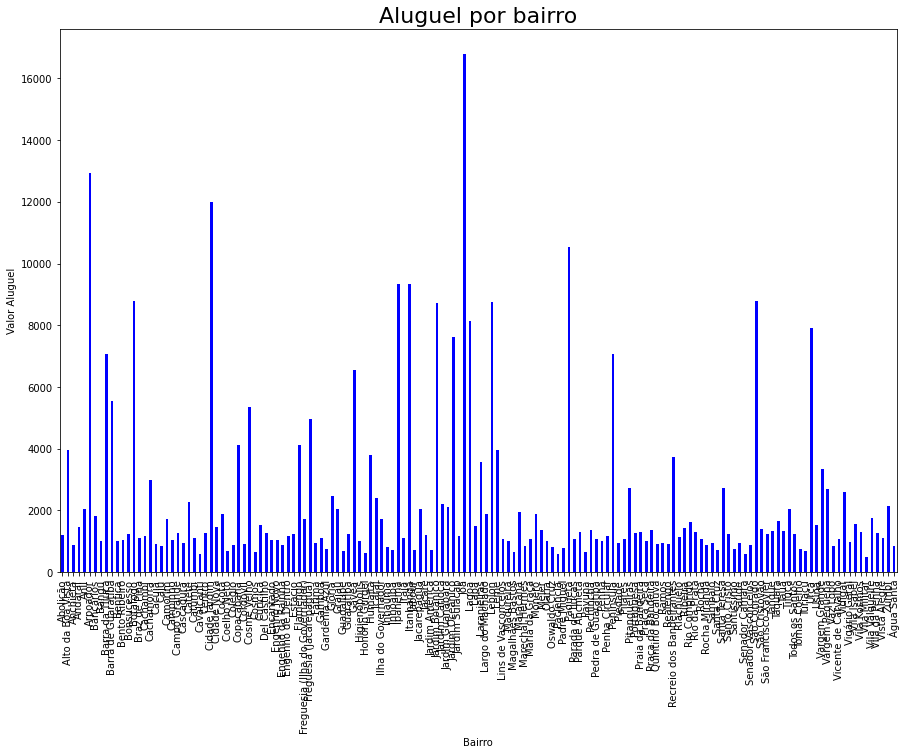

In [0]:
#Tem algum problema com valores de alguns bairros
#Estao muito altos
graph = grupo_bairro['Valor'].mean().plot.bar(color = "blue")
graph.set_ylabel('Valor Aluguel')
graph.set_title("Aluguel por bairro", {'fontsize': 22})

# Removendo Outliers (Valores esdruxulos)

In [0]:
residencial[residencial['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,M2,Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.8,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4908.0,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.7,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.0,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.0,Apartamento


In [0]:
#Faz uma series pra me dar o valor
valor = residencial['Valor']
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [0]:
#Primeiro quartil
#Ver imagem do boxplot
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [0]:
selecao = ((valor >= limite_inferior) & (valor <= limite_superior))
residencial_new = residencial[selecao]

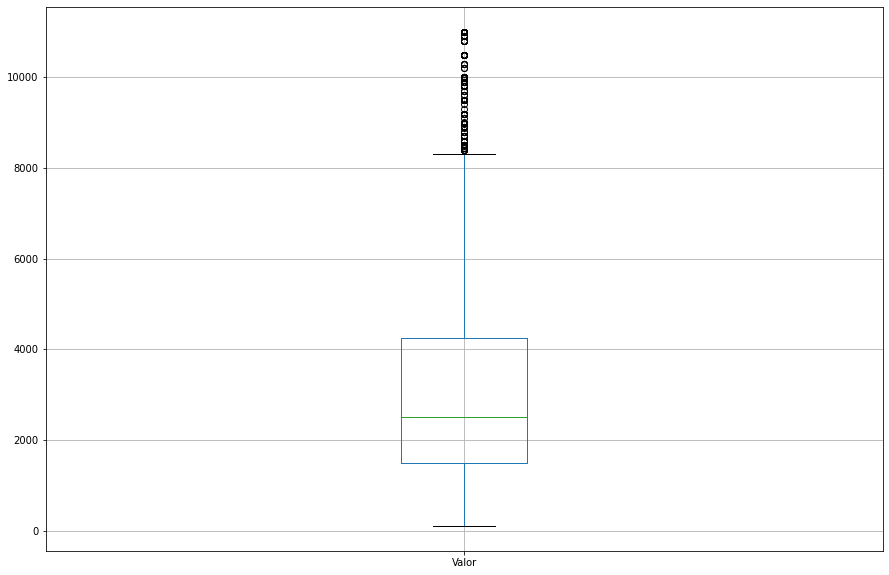

In [0]:
residencial_new.boxplot(["Valor"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0412e4cc0>]],
      dtype=object)

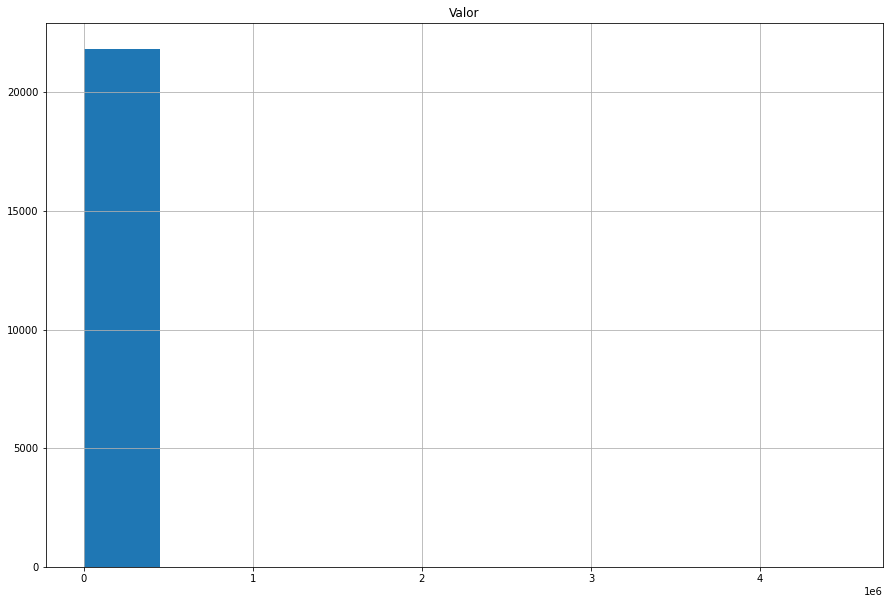

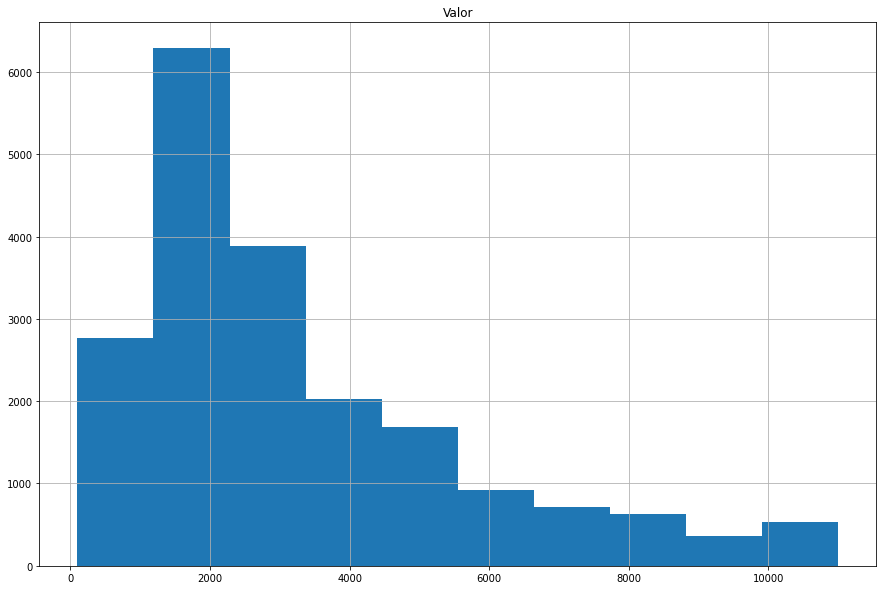

In [0]:
residencial.hist(["Valor"])
residencial_new.hist(["Valor"])

In [0]:
amostra = pd.read_csv("aluguel_amostra.csv", sep = ";")
amostra

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [0]:
#Passo 1: Faz uma series com o valor
#valor_m2 = amostra['Valor m2']
#Passo 2: Fazer a equaçao
#Q1 = valor_m2.quantile(.25)
#Q3 = valor_m2.quantile(.75)
#IIQ = Q3 - Q1
#limite_inferior = Q1 - 1.5 * IIQ
#limite_superior = Q3 + 1.5 * IIQ
#Passo 3: fazer uma selecao com esses valores
#Passo 4: Redefinir o dado original com a selecao
#Passo 5: Fazer boxplot em cima da coluna que me interessou fazer o outlier
#print([Q1,Q3,IIQ,limite_inferior,limite_superior])

### Continuacao (mais outliers, agora groupby)

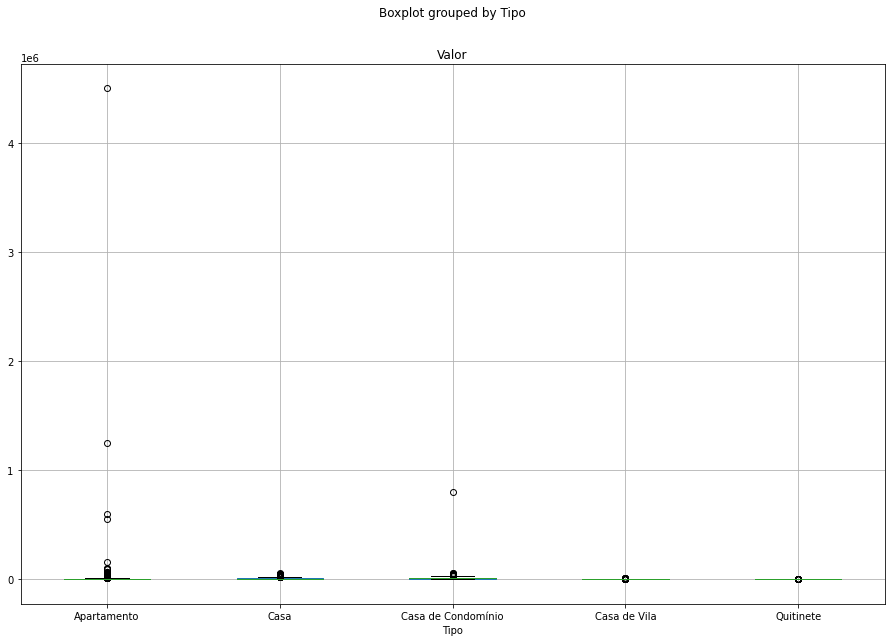

In [0]:
residencial.boxplot(["Valor"], by = "Tipo")

In [0]:
#So queremos trabalhar com o tipo relacionado com o valor
#Ou seja, nao quero data frame, quero uma series
#Esta agrupado por tipo e so tenho valor como coluna
grupo_tipo = residencial.groupby("Tipo")["Valor"]
type(grupo_tipo)
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [0]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
#Obs... Nao me deu um numero, mas me deu uma series
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [0]:
residencial_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = residencial['Tipo'] == tipo
  eh_dentro_limite = ((residencial['Valor'] >= limite_inferior[tipo]) & (residencial['Valor'] <= limite_superior[tipo]))
  selecao = (eh_tipo & eh_dentro_limite)
  residencial_selecao = residencial[selecao]
  residencial_new = pd.concat([residencial_new, residencial_selecao])

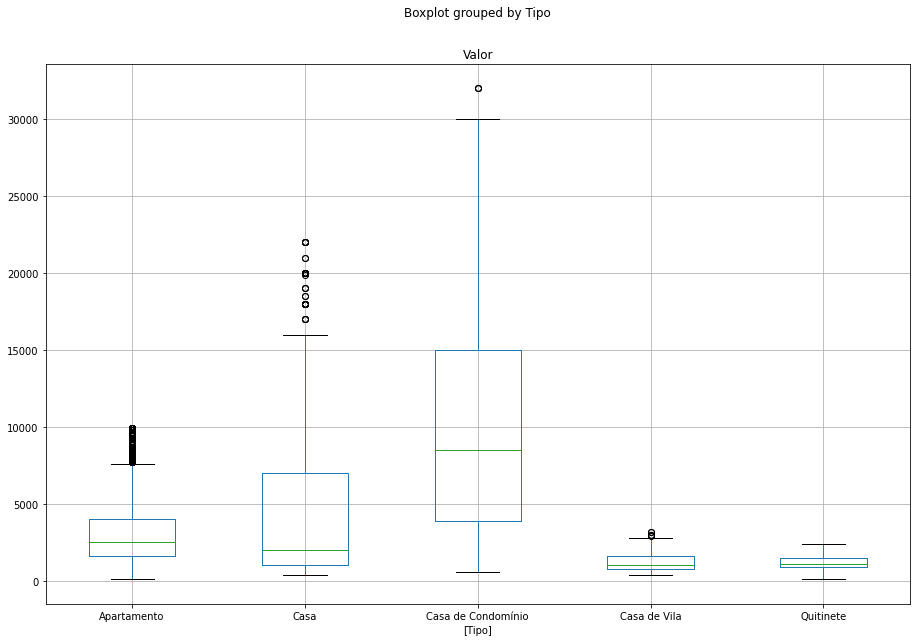

In [0]:
residencial_new.boxplot(["Valor"], by = ['Tipo'])

In [0]:
#LEMBRAR DE USAR O RESIDENCIAL_NEW PRA PROXIMA AULA